<a href="https://colab.research.google.com/github/Daima2024/Proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares
materias = [
    "Lengua y Literatura", "Matemática", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Arte", "Música",
    "Informática", "Filosofía", "Sociología"
]

# Lista de apellidos y nombres (puedes agregar más)
apellidos = ["García", "Rodríguez", "González", "Fernández", "López", "Martínez", "Pérez", "Gómez", "Sánchez", "Díaz"]
nombres = ["Juan", "María", "Carlos", "Laura", "Pedro", "Ana", "Luis", "Marta", "Javier", "Sofía"]


def generar_datos(num_filas):
  datos = []
  for _ in range(num_filas):
    apellido = random.choice(apellidos)
    nombre = random.choice(nombres)
    dni = np.random.randint(10000000, 99999999)
    materia = random.choice(materias)
    nota1 = np.random.randint(1, 11)
    nota2 = np.random.randint(1, 11)
    nota3 = np.random.randint(1, 11)
    faltas = np.random.randint(0, 20)
    datos.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])
  return datos


# Generar datos para al menos 100 filas
datos = generar_datos(100)

# Crear el DataFrame
df = pd.DataFrame(datos, columns=["Apellido", "Nombre", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

# Imprimir el DataFrame
df

,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Díaz,Javier,95248273,Filosofía,8,3,2,18
1,Díaz,Laura,69488962,Sociología,2,1,3,3
2,Gómez,Ana,53095583,Inglés,10,4,8,6
3,Díaz,Marta,39675198,Informática,4,5,4,1
4,García,Laura,85684626,Música,2,2,2,2
...,...,...,...,...,...,...,...,...
95,López,Carlos,64158715,Historia,5,5,2,17
96,Pérez,Pedro,24318109,Historia,8,9,9,12
97,Díaz,Laura,25911355,Geografía,6,8,10,17
98,Fernández,Pedro,83536463,Lengua y Literatura,8,4,4,17


<ipython-input-3-009e1648e068>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(promedio_materias.index, rotation=90)


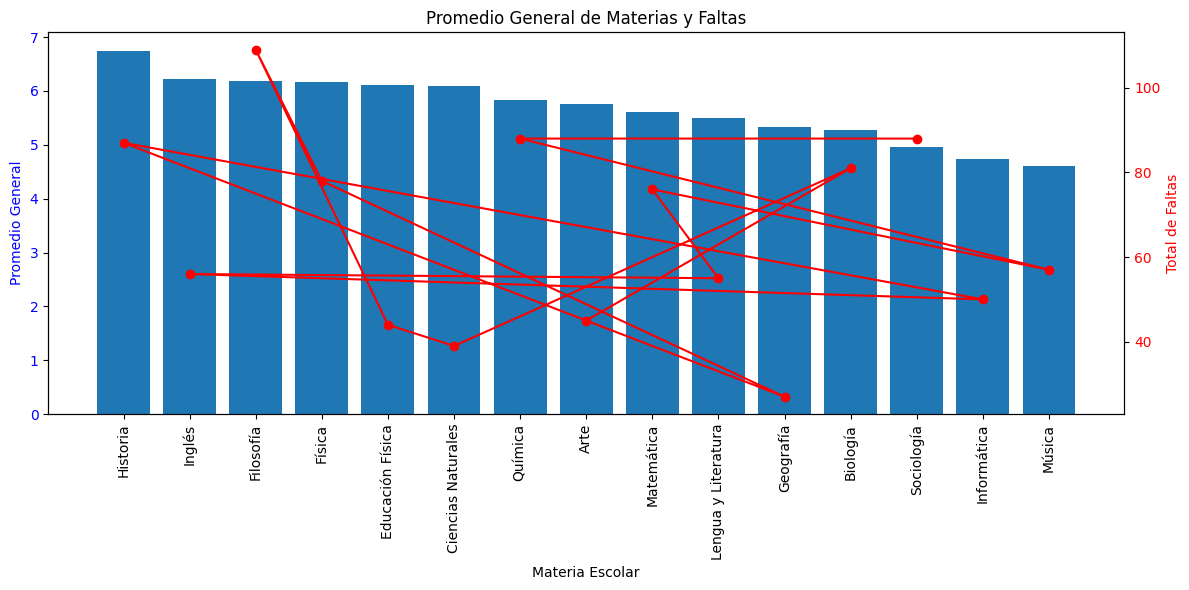

In [3]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio de cada materia
promedio_materias = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar de mayor a menor promedio
promedio_materias = promedio_materias.sort_values(ascending=False)

# Calcular el total de faltas por materia
faltas_materias = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar el promedio de las materias
ax1.bar(promedio_materias.index, promedio_materias.values)
ax1.set_ylabel('Promedio General', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Materia Escolar')
ax1.set_title('Promedio General de Materias y Faltas')
ax1.set_xticklabels(promedio_materias.index, rotation=90)

# Crear un segundo eje para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_materias.index, faltas_materias.values, color='red', marker='o')
ax2.set_ylabel('Total de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [5]:
df.to_csv("datos_alumnos.csv", index=False)
